In [1]:
import numpy as np
import torch
import os
import wandb
import matplotlib.pyplot as plt
from tqdm import tqdm
import argparse
import time
from sklearn.utils import check_random_state
from perfgen.models.simple_diffusion import SimpleDiffusion
from perfgen.generator import Performative_Generator
from perfgen.datasets.toy_data import sample_2d_data
from perfgen.argparse import my_parser

2023-08-21 11:10:05.389337: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-08-21 11:10:05.389467: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-08-21 11:10:05.389476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/ray/anaconda

In [2]:
from sklearn.utils import check_random_state
rng = check_random_state(0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = sample_2d_data('8gaussians', 5000, rng)

In [3]:
model = SimpleDiffusion(device)

In [4]:
model.train(data)

Max Value 0.999998 | Min Value -1.000000
Training model...


  0%|          | 0/200 [00:00<?, ?it/s]

tensor([0.3512, 0.5251, 0.3540,  ..., 0.2234, 0.3695, 0.5448])

In [5]:
gen_samples = model.generate(5000)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
import pdb

def plot_samples(
        dataset, gen_samples, npts=100, memory=100, title="$q(x)$", device="cpu", LOW = -4, HIGH = 4, plt_name = "Default"):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True)
    axs[0].scatter(dataset[:, 0], dataset[:, 1], alpha=0.5, s=15)
    gen_samples = gen_samples.view(-1, 2).detach().cpu().numpy()
    axs[1].scatter(gen_samples[:, 0], gen_samples[:, 1], alpha=0.5, s=15)
    axs[0].set_xlim([-4, 4])
    axs[0].set_ylim([-4, 4])
    plt.gcf().set_size_inches(5, 5)
    plt.show()

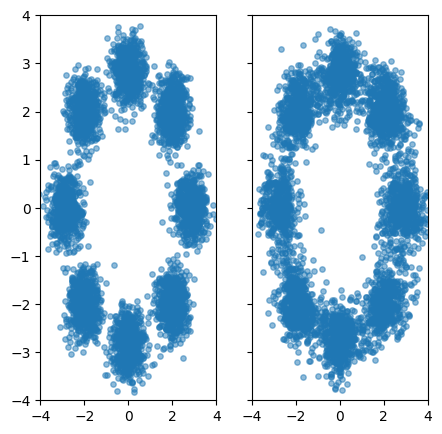

In [7]:
plot_samples(data, gen_samples)